In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1500)

In [2]:
# df1 = pd.read_csv("datasets/c_feb.csv")
# df2 = pd.read_csv("datasets/c_april.csv")
# df3 = pd.read_csv("datasets/c_jun.csv")
# df4 = pd.read_csv("datasets/c_aug.csv")
# df5 = pd.read_csv("datasets/c_oct.csv")
# df6 = pd.read_csv("datasets/c_dec.csv")

location = ["datasets/c_feb.csv", "datasets/c_jan.csv", "datasets/c_march.csv", "datasets/c_april.csv", 
            "datasets/c_may.csv", "datasets/c_jun.csv", "datasets/c_july.csv", "datasets/c_aug.csv", 
            "datasets/c_sept.csv", "datasets/c_oct.csv", "datasets/c_nov.csv", "datasets/c_dec.csv"]
# datasets = [df1, df2, df3, df4, df5, df6]

In [301]:
# for one month
df = df2

df = df.drop([0,1,2])
df = df.drop(df.columns[[2]], axis = 1)

df.columns = ["datetime", "temperature"]
df[['date','time']] = df.datetime.str.split("T",expand=True)

df["time_interval"] = df.time.astype('category').cat.codes

df["temperature"] = df["temperature"].apply(pd.to_numeric)
df = df.fillna(method="ffill")

df = df.drop(["date", "datetime", "time"], axis=1)

df.to_csv("datasets/test_data.csv", index=False)

In [3]:
cleaned_data = []

for link in location:
    
    df = pd.read_csv(link)
    df = df.drop([0,1,2])
    df = df.drop(df.columns[[2]], axis = 1)
    
    df.columns = ["datetime", "temperature"]
    df[['date','time']] = df.datetime.str.split("T",expand=True)
    
    df["time_interval"] = df.time.astype('category').cat.codes
    
    df["temperature"] = df["temperature"].apply(pd.to_numeric)
    df = df.fillna(method="ffill")
    
    df = df.drop(["date", "datetime", "time"], axis=1)
    
#     df["temperature"].plot(label=f'month {i}')
    cleaned_data.append(df)

In [5]:
df = pd.concat(cleaned_data)
df.info

<bound method DataFrame.info of       temperature  time_interval
3          29.941              0
4          29.941              1
5          29.941              2
6          29.966              3
7          29.941              4
...           ...            ...
7078       28.171            235
7079       28.171            236
7080       28.196            237
7081       28.196            238
7082       28.171            239

[101380 rows x 2 columns]>

In [6]:
df.to_csv("datasets/cleaned_data.csv", index=False)

In [260]:
def printdata():
    while True:
        for i in range(len(df)):    
            temp, time = df.iloc[i, :]
            yield temp, time

In [261]:
generator = printdata()

In [215]:
def infinite_sequence():
    num = 0
    while True:
        yield num
        num += 1

In [217]:
temp = infinite_sequence()

In [299]:
generator.__next__()

(29.89, 37.0)

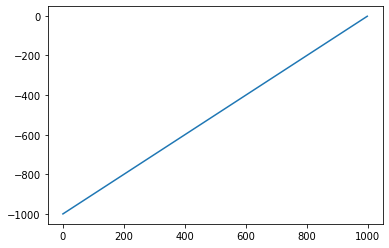

In [304]:
#plot for my brain to understand that how rewards work

plt.plot(range(1,1000), range(-1000, -1))